In [28]:
import numpy as np
import polars as pl
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pl.read_csv('../../DATA/cement_slump.csv')

In [30]:
df

Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
…,…,…,…,…,…,…,…,…,…
248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.5


In [31]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Compressive Strength (28-day)(Mpa)
f64
0.445656
-0.331522
0.44438
-0.25432
-0.037909
-0.16061
-0.154532
-0.223499
-0.124189


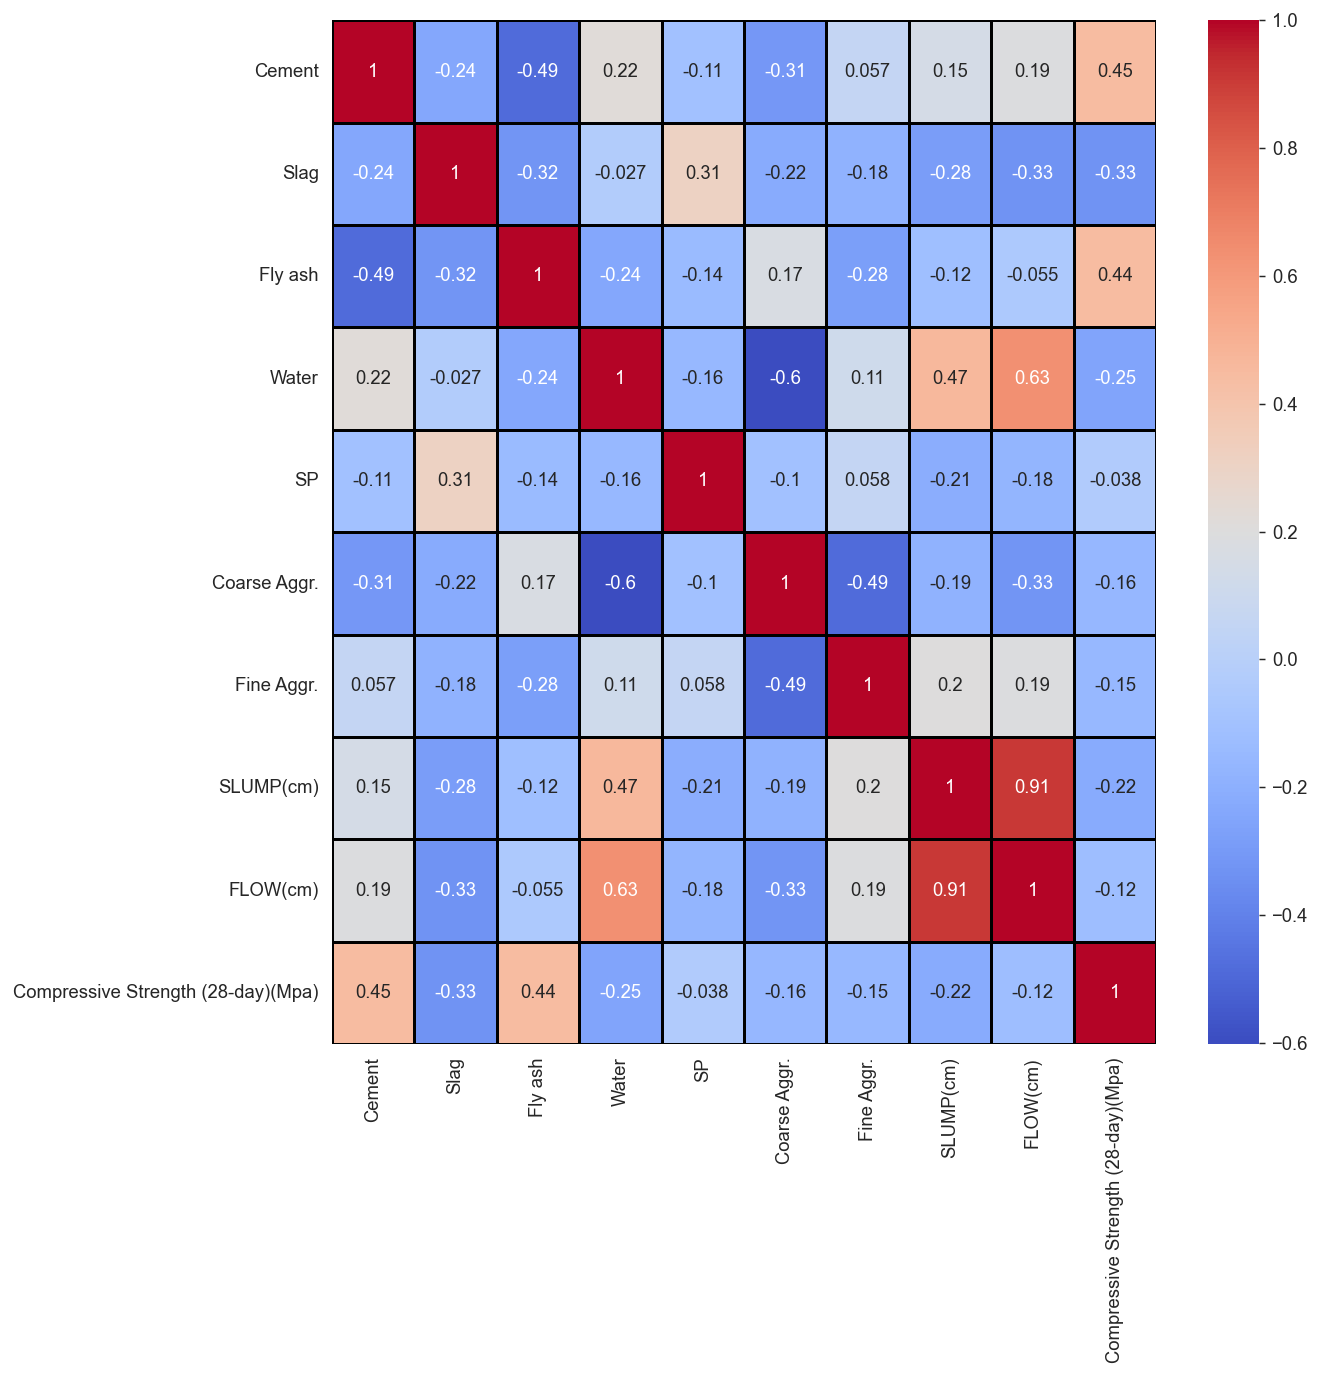

In [32]:
plt.figure(figsize=(10, 10), dpi=133)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=1.5, linecolor='Black', cbar=True, xticklabels=df
            .columns, yticklabels=df.columns)
plt.show()

In [33]:
df.columns

['Cement',
 'Slag',
 'Fly ash',
 'Water',
 'SP',
 'Coarse Aggr.',
 'Fine Aggr.',
 'SLUMP(cm)',
 'FLOW(cm)',
 'Compressive Strength (28-day)(Mpa)']

In [34]:
X = df.select(cs.exclude(['Compressive Strength (28-day)(Mpa)']))

In [35]:
y = df['Compressive Strength (28-day)(Mpa)']

In [36]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)

In [46]:
scaled_X_test = scaler.transform(X_test)

In [47]:
from sklearn.svm import SVR

In [48]:
base_model = SVR()

In [49]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [50]:
base_pred = base_model.predict(scaled_X_test)

In [61]:
pl.DataFrame(base_pred, schema=[y.name])

Compressive Strength (28-day)(Mpa)
f64
33.545385
36.884883
35.318625
34.498298
38.788627
…
34.496466
33.010478
36.06718


In [78]:
pl.DataFrame({
    'actual': y_test,
    'pred': base_pred,
    'error': y_test - base_pred,
    'abs_error': np.abs(y_test - base_pred),
    'MSE': (y_test - base_pred) ** 2,
})

actual,pred,error,abs_error,MSE
f64,f64,f64,f64,f64
18.26,33.545385,-15.285385,15.285385,233.642997
41.14,36.884883,4.255117,4.255117,18.106018
31.9,35.318625,-3.418625,3.418625,11.686999
26.42,34.498298,-8.078298,8.078298,65.258903
44.48,38.788627,5.691373,5.691373,32.391728
…,…,…,…,…
30.43,34.496466,-4.066466,4.066466,16.536146
26.42,33.010478,-6.590478,6.590478,43.434396
41.81,36.06718,5.74282,5.74282,32.979985


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [71]:
MAE = mean_absolute_error(y_test, base_pred)

In [72]:
MSE = mean_squared_error(y_test, base_pred)

In [74]:
RMSE = root_mean_squared_error(y_test, base_pred)

In [75]:
print(f'MAE: {MAE}\n MSE: {MSE}\n RMSE: {RMSE}')

MAE: 5.236902091259179
 MSE: 44.835275522129486
 RMSE: 6.695914838327134


In [100]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 15, 20, 25, 50, 75, 95, 99, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 100],
}

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
svr = SVR()

In [103]:
grid_model = GridSearchCV(
    svr, param_grid, cv=5, verbose=1, n_jobs=-1
)

In [104]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 15680 candidates, totalling 78400 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 15, 20, 25, 50, 75,
                               95, 99, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25,
                                    50],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [105]:
grid_model.best_params_

{'C': 50, 'degree': 1, 'epsilon': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [106]:
pl.DataFrame(
    {
        'C': grid_model.cv_results_['param_C'],
        'gamma': grid_model.cv_results_['param_gamma'],
        'kernel': grid_model.cv_results_['param_kernel'],
        'degree': grid_model.cv_results_['param_degree'],
        'epsilon': grid_model.cv_results_['param_epsilon'],
        'mean_test_score': grid_model.cv_results_['mean_test_score'],
    }
)

C,gamma,kernel,degree,epsilon,mean_test_score
f64,str,str,i32,f64,f64
0.001,"""scale""","""linear""",1,0.0,-0.044052
0.001,"""scale""","""poly""",1,0.0,-0.050186
0.001,"""scale""","""rbf""",1,0.0,-0.050593
0.001,"""scale""","""sigmoid""",1,0.0,-0.050309
0.001,"""auto""","""linear""",1,0.0,-0.044052
…,…,…,…,…,…
100.0,"""scale""","""sigmoid""",50,100.0,-0.029449
100.0,"""auto""","""linear""",50,100.0,-0.029449
100.0,"""auto""","""poly""",50,100.0,-0.029449


In [107]:
predicts = grid_model.predict(scaled_X_test)

In [108]:
pl.DataFrame({
    'actual': y_test,
    'Predictions': predicts,
    'MAE': mean_absolute_error(y_test, predicts),
    'MSE': mean_squared_error(y_test, predicts),
    'RMSE': root_mean_squared_error(y_test, predicts),
})

actual,Predictions,MAE,MSE,RMSE
f64,f64,f64,f64,f64
18.26,21.178142,1.947105,8.980397,2.996731
41.14,38.82159,1.947105,8.980397,2.996731
31.9,33.136087,1.947105,8.980397,2.996731
26.42,28.462457,1.947105,8.980397,2.996731
44.48,44.069383,1.947105,8.980397,2.996731
…,…,…,…,…
30.43,31.303799,1.947105,8.980397,2.996731
26.42,27.681073,1.947105,8.980397,2.996731
41.81,37.188331,1.947105,8.980397,2.996731


In [109]:
MAE = mean_absolute_error(y_test, predicts)

In [110]:
MSE = mean_squared_error(y_test, predicts)

In [111]:
RMSE = root_mean_squared_error(y_test, predicts)

In [113]:
print(f'MAE: {MAE}\n MSE: {MSE}\n RMSE: {RMSE}')

MAE: 1.94710540371379
 MSE: 8.980397250440701
 RMSE: 2.996731094115837


In [116]:
from sklearn.metrics import accuracy_score, classification_report